In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/"My Drive"/agaricus-lepiota.data agaricus-lepiota.data 

In [0]:
!ls

agaricus-lepiota.data  drive  sample_data


# Постановка задачи

Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жареных грибов семейства Agaricus и Lepiota. Каждый вид идентифицируется как съедобный и ядовитый.

Информация о данных:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Считывание данных

In [0]:
import pandas as pd 
import numpy as np
data = pd.read_csv("agaricus-lepiota.data", sep=',', header=None)
data.columns = ['edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachmen', 'gill-spacing', 
                'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [0]:
data

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachmen,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


# Обработка данных

Пропущенные значения имеют вид "?", а не NaN как обычно 

In [0]:
for column in data.columns:
  print(column, data[column].unique())

edible ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachmen ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [0]:
data = data.drop( columns=['veil-type'])

In [0]:
data = data.replace(to_replace = "?", value=np.nan) 

In [0]:
for column in data.columns:
  print(column, data[column].mode())
data = data.fillna(data.mode().iloc[0])
data

edible 0    e
dtype: object
cap-shape 0    x
dtype: object
cap-surface 0    y
dtype: object
cap-color 0    n
dtype: object
bruises 0    f
dtype: object
odor 0    n
dtype: object
gill-attachmen 0    f
dtype: object
gill-spacing 0    c
dtype: object
gill-size 0    b
dtype: object
gill-color 0    b
dtype: object
stalk-shape 0    t
dtype: object
stalk-root 0    b
dtype: object
stalk-surface-above-ring 0    s
dtype: object
stalk-surface-below-ring 0    s
dtype: object
stalk-color-above-ring 0    w
dtype: object
stalk-color-below-ring 0    w
dtype: object
veil-color 0    w
dtype: object
ring-number 0    o
dtype: object
ring-type 0    p
dtype: object
spore-print-color 0    w
dtype: object
population 0    v
dtype: object
habitat 0    d
dtype: object


,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachmen,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,b,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,b,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,b,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,b,s,k,w,w,w,o,e,w,v,l


Обработка категориальных признаков

In [0]:
data.at[data['edible'] == 'p', 'edible'] = 1
data.at[data['edible'] == 'e', 'edible'] = 0

data.at[data['bruises'] == 't', 'bruises'] = 1
data.at[data['bruises'] == 'f', 'bruises'] = 0

data.at[data['gill-attachmen'] == 'f', 'gill-attachmen'] = 1
data.at[data['gill-attachmen'] == 'a', 'gill-attachmen'] = 0

data.at[data['gill-spacing'] == 'c', 'gill-spacing'] = 1
data.at[data['gill-spacing'] == 'w', 'gill-spacing'] = 0

data.at[data['gill-size'] == 'n', 'gill-size'] = 1
data.at[data['gill-size'] == 'b', 'gill-size'] = 0

data.at[data['stalk-shape'] == 'e', 'stalk-shape'] = 1
data.at[data['stalk-shape'] == 't', 'stalk-shape'] = 0

# ring number 
data.at[data['ring-number'] == 'n', 'ring-number'] = 0 #none
data.at[data['ring-number'] == 'o', 'ring-number'] = 1 #one
data.at[data['ring-number'] == 't', 'ring-number'] = 2 #two

In [0]:
for column in data.columns:
  print(column, data[column].unique())

edible [1 0]
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises [1 0]
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachmen [1 0]
gill-spacing [1 0]
gill-size [1 0]
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape [1 0]
stalk-root ['e' 'c' 'b' 'r']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color ['w' 'n' 'o' 'y']
ring-number [1 2 0]
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [0]:
data.describe(include = 'all')

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachmen,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,4,3,5,9,6,7
top,0,x,y,n,0,n,1,1,0,b,0,b,s,s,w,w,w,1,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,6256,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [0]:
nonbinary_columns = [c for c in data.columns if len(data[c].unique()) > 2]
nonbinary_columns.remove('ring-number')

print(nonbinary_columns)

data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']
Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=102)


In [0]:
column_without_nonbinary = [i for i in data.columns if i not in nonbinary_columns]
data = pd.concat((data_nonbinary, data[column_without_nonbinary]), axis = 1)

In [0]:
data.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,...,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,0.399311,0.020679,0.005416,0.184638,0.226489,0.281142,0.017725,0.001969,0.001969,0.128016,0.131955,0.049237,0.023634,0.265879,0.049237,0.004431,0.434269,0.031512,0.070901,0.070901,0.212703,0.011817,0.092565,0.090103,0.050222,0.129000,0.007878,0.183653,0.002954,0.060561,0.147957,...,0.053176,0.004431,0.011817,0.070901,0.063023,0.023634,0.230428,0.539636,0.002954,0.011817,0.011817,0.975382,0.000985,0.341704,0.005908,0.159527,0.004431,0.488429,0.005908,0.200886,0.230428,0.242245,0.005908,0.008863,0.005908,0.293944,0.005908,0.047267,0.041851,0.049237,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,0.489787,0.142318,0.073399,0.388028,0.418585,0.449584,0.131959,0.044338,0.044338,0.334128,0.338462,0.216375,0.151914,0.441827,0.216375,0.066425,0.495691,0.174706,0.256675,0.256675,0.409245,0.108068,0.289840,0.286347,0.218415,0.335221,0.088413,0.387225,0.054276,0.238539,0.355079,...,0.224398,0.066425,0.108068,0.256675,0.243020,0.151914,0.421133,0.498457,0.054276,0.108068,0.108068,0.154969,0.031367,0.474310,0.076644,0.366190,0.066425,0.499897,0.076644,0.400688,0.421133,0.428468,0.076644,0.093729,0.076644,0.455595,0.076644,0.212223,0.200262,0.216375,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [0]:
data.corr()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,...,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,0.010011,-0.017912,-0.115505,-0.069760,-0.084902,0.016231,-0.010782,-0.010782,0.212380,0.117981,0.262455,-0.037764,-0.146074,0.262455,-0.016194,-0.000314,-0.043783,-0.067052,-0.067052,-0.126163,-0.026543,0.122587,-0.076382,0.101547,0.034751,0.075558,-0.070747,0.105523,-0.061628,0.084884,...,-0.057522,-0.016194,-0.026543,-0.067052,-0.045272,0.131922,-0.132818,0.157391,0.046155,0.092724,0.092724,-0.134710,0.026622,-0.163553,-0.018713,-0.105748,-0.016194,0.237666,0.065370,-0.121699,0.030409,0.038235,0.065370,0.183315,-0.018713,-0.024592,0.065370,-0.054064,0.024358,0.381589,0.158702,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,-0.003225,-0.001638,-0.010562,-0.012010,-0.013880,-0.002981,-0.000986,-0.000986,0.024711,0.024136,-0.005051,-0.003453,-0.013357,-0.005051,-0.001481,0.025332,-0.004003,-0.006131,-0.006131,-0.011536,-0.002427,-0.007089,-0.006984,-0.005104,-0.008542,-0.001978,-0.010527,-0.001208,-0.005635,0.037634,...,-0.005260,-0.001481,-0.002427,-0.006131,-0.005756,-0.003453,-0.012145,-0.001765,0.203269,-0.002427,-0.002427,-0.068089,0.353118,0.007408,-0.001711,-0.009670,-0.001481,0.000514,-0.001711,-0.011128,-0.012145,-0.012549,-0.001711,-0.002099,-0.001711,0.034398,-0.001711,-0.004944,0.106197,-0.005051,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,0.019203,-0.003687,0.009128,0.056794,0.019014,-0.045696,0.010211,0.010211,-0.088841,-0.010390,-0.097130,-0.123876,0.083449,-0.097130,-0.007483,0.066856,0.041464,-0.030983,-0.030983,-0.058296,-0.012265,-0.048604,0.072336,-0.025790,0.007077,-0.025233,0.059448,0.012513,0.032947,-0.013773,...,0.054476,-0.007483,-0.012265,0.063501,0.042985,-0.044056,0.039405,-0.092710,-0.015414,-0.030966,-0.030966,0.044987,-0.008890,-0.014407,0.017722,0.100147,-0.007483,-0.061414,-0.021831,0.115253,0.015410,0.014411,-0.021831,0.021737,0.017722,-0.125597,-0.021831,0.051201,-0.035214,-0.181191,-0.075804,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,-0.003209,0.041662,0.162657,-0.135632,0.125992,0.004081,-0.014965,-0.014965,-0.068190,-0.124132,-0.076662,-0.052412,-0.025921,-0.076662,0.051031,-0.098152,-0.060766,0.211298,0.211298,0.397574,0.083644,-0.062672,-0.106010,-0.077465,-0.110226,0.043614,-0.126160,-0.018337,-0.085533,-0.024646,...,-0.079835,0.051031,0.083644,-0.093061,-0.047186,0.076150,0.093916,-0.023524,0.026642,0.053523,0.053523,-0.077

# KNN

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x = data.drop('edible', axis = 1) 
y = data['edible']

x = x.to_numpy()
y = np.array(y, dtype='int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 228)

In [0]:
print(y)

[1 0 0 ... 0 1 0]


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 500)
knn.fit(x_train, y_train)

y_test_predict = knn.predict(x_test)

print(confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict))

[[824  12]
 [ 64 725]]
0.9532307692307692


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(x_train, y_train)

y_test_predict = knn.predict(x_test)

print(confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict))

[[836   0]
 [  2 787]]
0.9987692307692307


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

y_test_predict = knn.predict(x_test)

print(confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict))

[[836   0]
 [  0 789]]
1.0


In [0]:
def train_and_valuate(model, x, y):
  kf = KFold(n_splits=5)
  accuracy = cross_val_score(model, principal_df, y, cv=kf)
  print("Accuracy: {}".format(accuracy))
  print("Mean accuracy: {}".format(sum(accuracy)/len(accuracy)))

In [0]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
train_and_valuate(knn1, x, y)
knn2 = KNeighborsClassifier(n_neighbors = 50)
train_and_valuate(knn2, x, y)
knn3 = KNeighborsClassifier(n_neighbors = 500)
train_and_valuate(knn3, x, y)

Accuracy: [0.91692308 0.89969231 0.89353846 0.832      0.88731527]
Mean accuracy: 0.8858938234179613
Accuracy: [0.90276923 0.93723077 0.90030769 0.78276923 0.90332512]
Mean accuracy: 0.8852804092459264
Accuracy: [0.88123077 0.93230769 0.88553846 0.77353846 0.93472906]
Mean accuracy: 0.8814688897309587


# Lab 2

Применение PCA

In [0]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Визуализируем полученные данные

      principal component 1  principal component 2
0                 -1.489695               0.294918
1                 -1.486889              -0.451306
2                 -1.646075              -0.207699
3                 -1.512454              -0.054455
4                 -1.223310               0.360842
...                     ...                    ...
8119              -0.515014               0.178104
8120              -0.425453               0.194166
8121              -0.626133               0.014044
8122               0.962598               1.927500
8123              -0.596165               0.006934

[8124 rows x 2 columns]


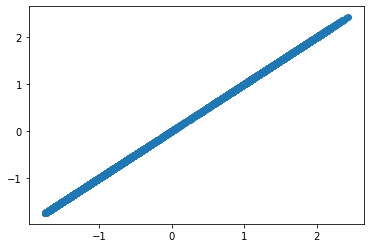

In [0]:
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
print(principal_df)
scatter(principal_df["principal component 1"], principal_df["principal component 1"])

Попробуем работу моделей с разным количеством компонент

In [0]:
def pca_train_and_valuate(model, number_compenent, x, y):
  pca = PCA(n_components=number_compenent)
  principalComponents = pca.fit_transform(x)
  col = ['principal component {}'.format(i) for i in range(1, number_compenent + 1)]
  principal_df = pd.DataFrame(data = principalComponents, columns = col)
  
  kf = KFold(n_splits=5)

  test_accuracy = cross_val_score(model, principal_df, y, scoring='accuracy',cv=kf)
  print("Accuracy: {}".format(test_accuracy))
  print("Mean accuracy: {}".format(sum(test_accuracy)/len(test_accuracy)))
  return sum(test_accuracy)/len(test_accuracy)


In [0]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 5)
acc_val = []

In [190]:
acc_val.append(pca_train_and_valuate(knn, 2, x, y))

Accuracy: [0.91692308 0.89969231 0.89353846 0.832      0.88731527]
Mean accuracy: 0.8858938234179613


In [191]:
acc_val.append(pca_train_and_valuate(knn, 3, x, y))

Accuracy: [0.90646154 0.99446154 0.96492308 0.92861538 0.87068966]
Mean accuracy: 0.9330302387267905


In [192]:
acc_val.append(pca_train_and_valuate(knn, 4, x, y))

Accuracy: [0.94892308 0.99876923 0.984      0.94707692 0.88916256]
Mean accuracy: 0.9535863584691171


In [193]:
acc_val.append(pca_train_and_valuate(knn, 5, x, y))

Accuracy: [0.93907692 1.         1.         0.96       0.92549261]
Mean accuracy: 0.9649139067828723


In [194]:
acc_val.append(pca_train_and_valuate(knn, 6, x, y))

Accuracy: [0.90830769 1.         1.         0.95753846 0.95566502]
Mean accuracy: 0.9643022356953391


Лучшее значение - 5 главных компонент

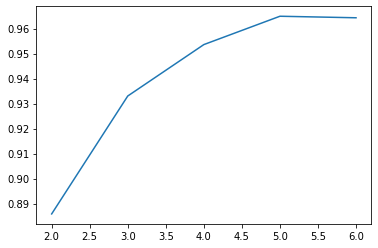

In [196]:
plot([2, 3, 4, 5, 6], acc_val)
pass

Пробуем SVM

In [0]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
train_and_valuate(clf, x, y)
pca_train_and_valuate(clf, 4, x, y)

Accuracy: [0.88123077 0.93230769 0.88738462 0.77784615 0.92918719]
Mean accuracy: 0.8815912845774916
Accuracy: [0.86646154 0.992      0.95753846 0.89723077 0.83128079]
Mean accuracy: 0.9089023114816218


Вывод: Метод PCA действительно позволяет значительно улучшить качество предсказания. Точность повысилась с 0.88 до 0.96 у метода ближайшего соседа, с 0.88 до 0.90 у SVM для данной задачи.